In [ ]:
# scipy.stats.kendalltau
# add performance analysis of time
# feature pertebration

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
%cd ../../PGGCN/

/home/ali/GBNN/PGGCN


In [5]:
K = 5
PGCN_PG_hists = pickle.load(open('PGCN_PG_K5_fold_hists.pkl', 'rb'))
PGCN_PG_loss = np.array(pickle.load(open('PGCN_PG_K5_fold_test.pkl', 'rb')))
PGCN_DD_hists = pickle.load(open('PGCN_DD_K5_fold_hists.pkl', 'rb'))
PGCN_DD_loss = np.array(pickle.load(open('PGCN_DD_K5_fold_test.pkl', 'rb')))
PGCN_PG_single = pickle.load(open('PGCN_PG_single.pkl', 'rb'))
PGCN_DD_single = pickle.load(open('PGCN_DD_single.pkl', 'rb'))
PGNN_PG_hists = pickle.load(open('PGNN_PG_K5_hists.pkl', 'rb'))
PGNN_PG_loss = np.array(pickle.load(open('PGNN_PG_K5_loss.pkl', 'rb')))
PGNN_DD_hists = pickle.load(open('PGNN_DD_K5_hists.pkl', 'rb'))
PGNN_DD_loss = np.array(pickle.load(open('PGNN_DD_K5_loss.pkl', 'rb')))
PGNN_PG_single = pickle.load(open('PGNN_PG_single.pkl', 'rb'))
PGNN_DD_single = pickle.load(open('PGNN_DD_single.pkl', 'rb'))
# Alles_hists = pickle.load(open('Alles_hists.pkl', 'rb'))
# Alles_loss = np.array(pickle.load(open('Alles_loss.pkl', 'rb')))
# Alles_single = pickle.load(open('../Notebooks/Entropy/JCIM_result/Alles_single.pkl', 'rb'))
PGCN_PG_pred = pickle.load(open('PGCN_PG_K5_fold_train_pred.pkl', 'rb'))
PGCN_DD_pred = pickle.load(open('PGCN_DD_K5_fold_train_pred.pkl', 'rb'))
PGNN_PG_pred = pickle.load(open('PGNN_PG_K5_predicts_train.pkl', 'rb'))
PGNN_DD_pred = pickle.load(open('PGNN_DD_K5_predicts_train.pkl', 'rb'))
y = pickle.load(open('y_folds_5.pkl', 'rb'))

# Convert to CSV

In [6]:
PRGCN_pred = np.array(PGCN_PG_pred)
RGCN_pred = np.array(PGCN_DD_pred)
PGCN_pred = np.array(PGNN_PG_pred)
GCN_pred = np.array(PGNN_DD_pred)

In [5]:
np.save(open('PRGCN_pred.npy', 'wb'), PRGCN_pred)
np.save(open('RGCN_pred.npy', 'wb'), RGCN_pred)
np.save(open('PGCN_pred.npy', 'wb'), PGCN_pred)
np.save(open('GCN_pred.npy', 'wb'), GCN_pred)

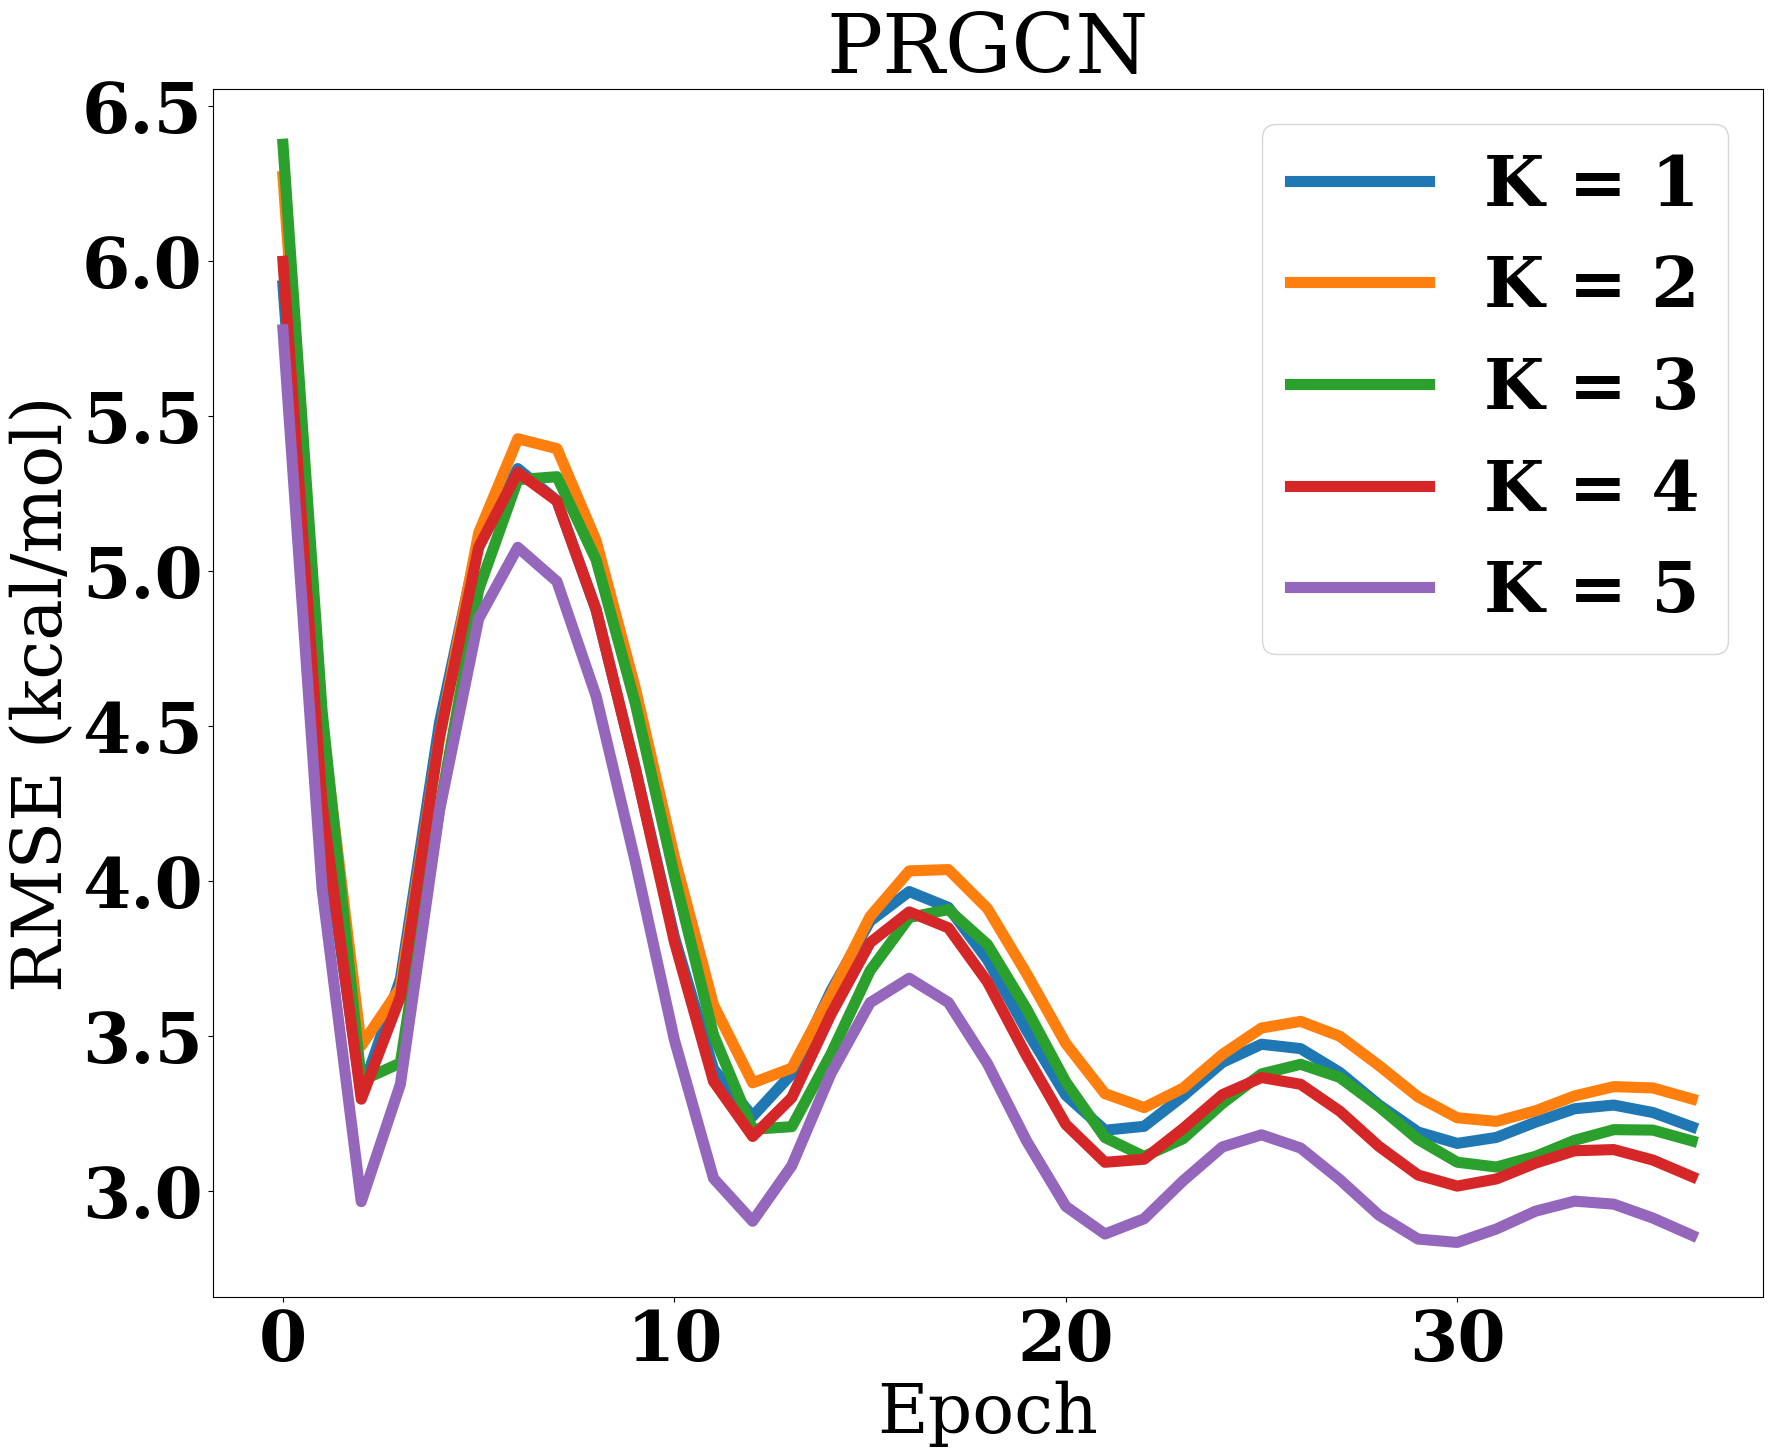

In [21]:
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 50}

matplotlib.rc('font', **font)
figure(figsize=(20, 16), dpi=100)
for i in range(K):
    plt.plot(PGCN_PG_hists[i][3:40], label='K = %d' % (i + 1), linewidth=8)
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('PRGCN')
plt.legend()
plt.savefig('PGCN_PG_K_fold.png')

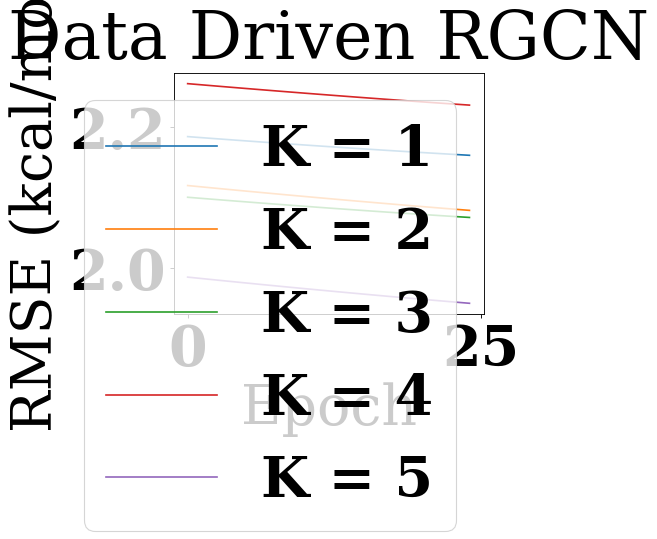

In [23]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGCN_DD_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Data Driven RGCN')
plt.legend()

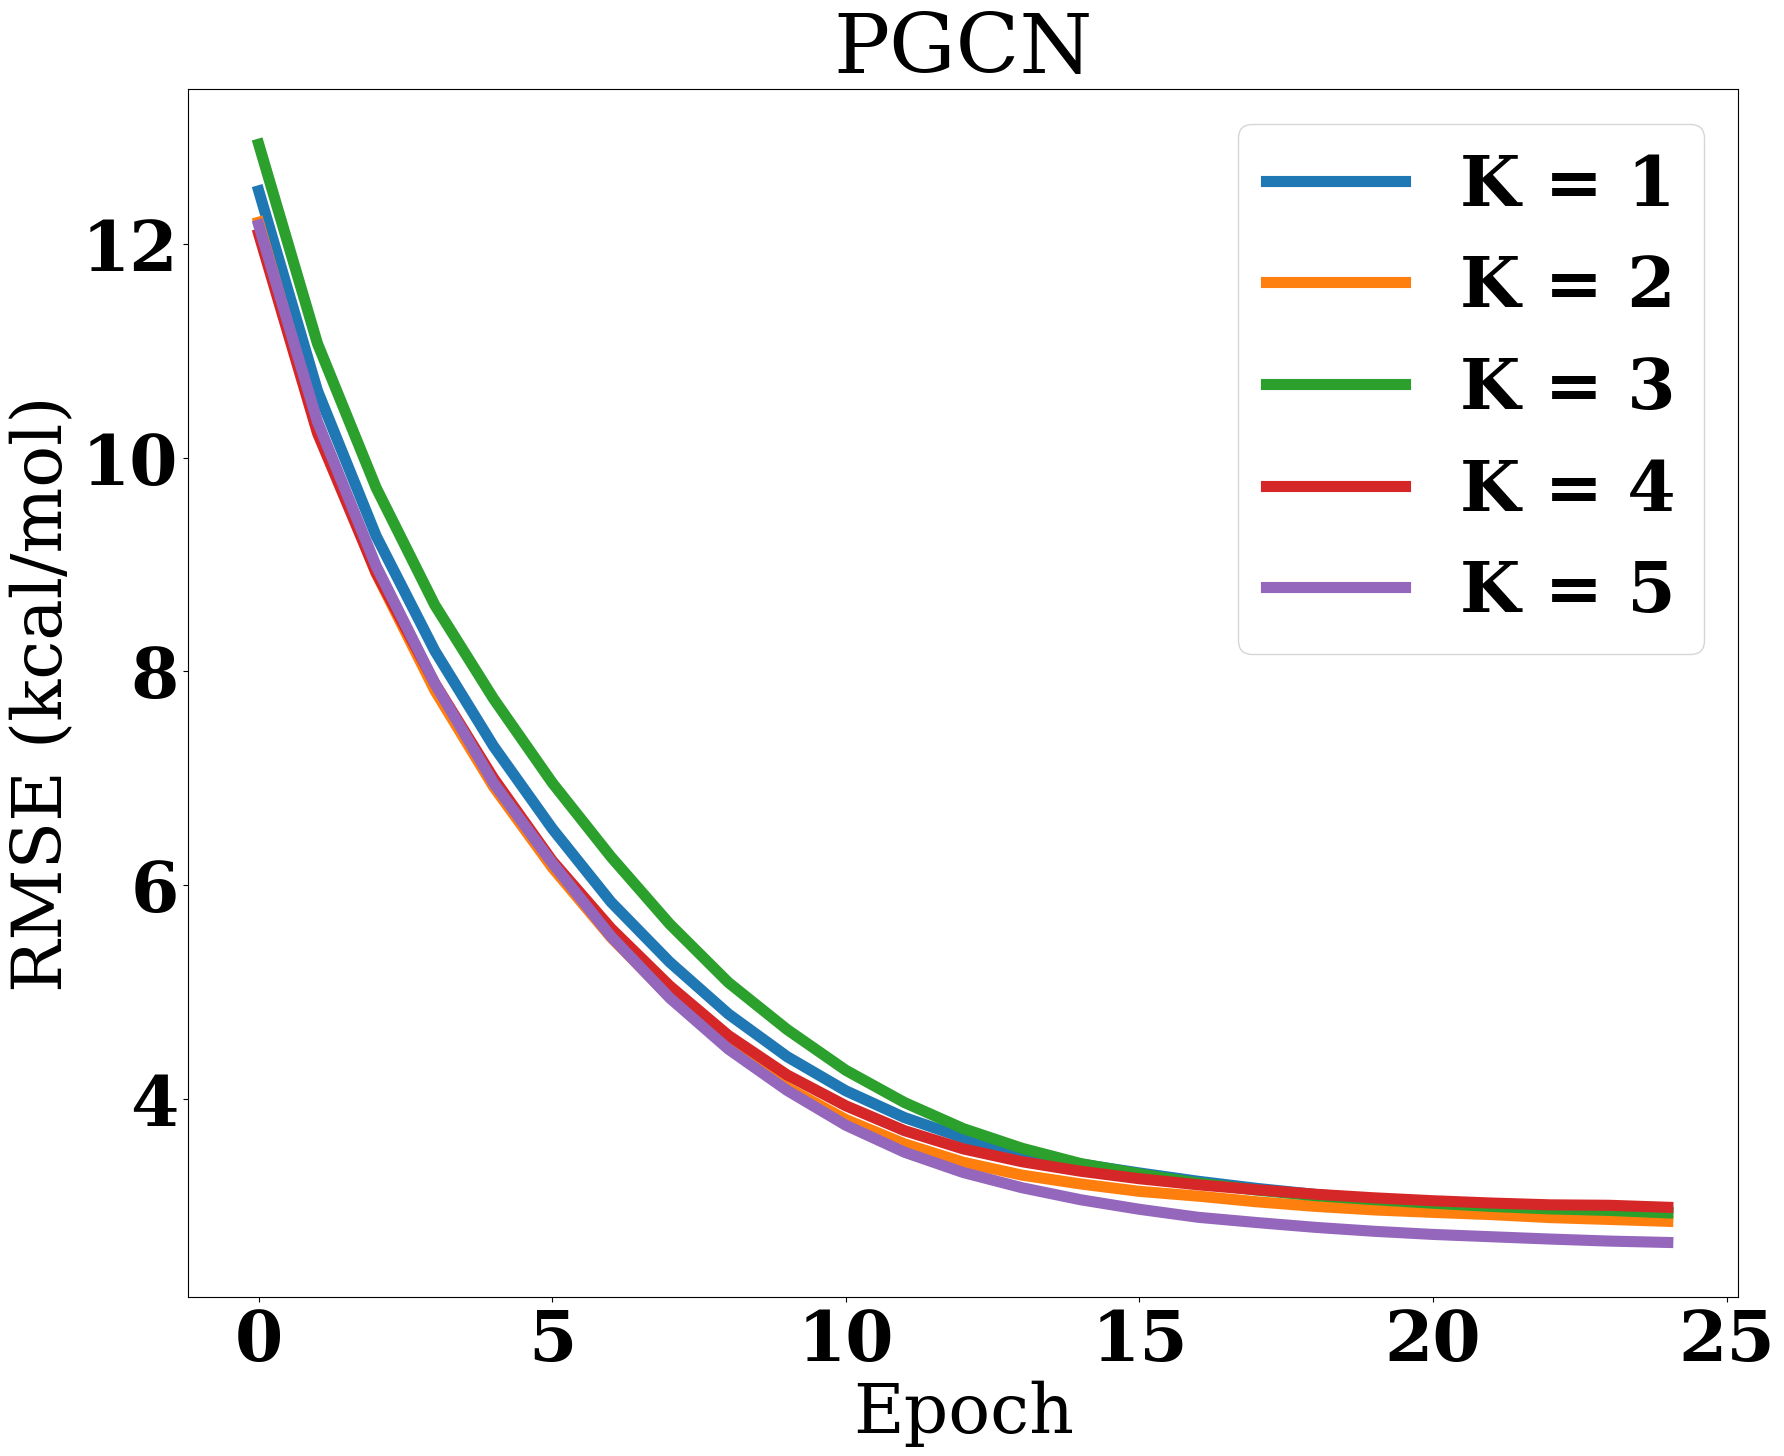

In [26]:
figure(figsize=(20, 16), dpi=100)
for i in range(K):
    plt.plot(PGNN_PG_hists[i][:35], label='K = %d' % (i + 1), linewidth=8)
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('PGCN')
plt.legend()
plt.savefig('PGNN_PG_K_fold.png')

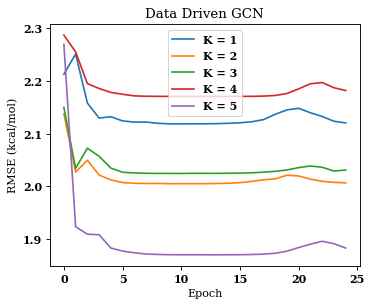

In [9]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGNN_DD_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Data Driven GCN')
plt.legend()

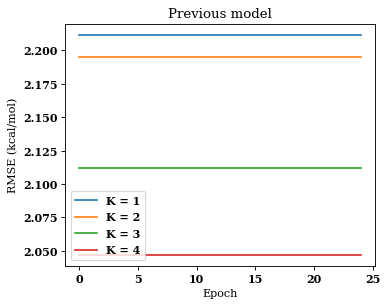

In [10]:
figure(figsize=(5, 4), dpi=80)
for i in range(4):
    plt.plot(Alles_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Previous model')
plt.legend()

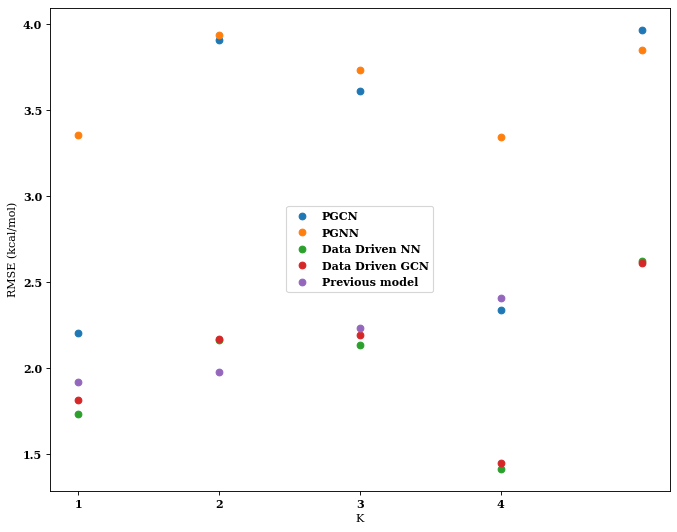

In [11]:
figure(figsize=(10, 8), dpi=80)
plt.plot(PGCN_PG_loss, 'o', label = 'PGCN')
plt.plot(PGNN_PG_loss, 'o', label = 'PGNN')
plt.plot(PGNN_DD_loss, 'o', label = 'Data Driven NN')
plt.plot(PGCN_DD_loss, 'o', label = 'Data Driven GCN')
plt.plot(Alles_loss, 'o', label = 'Previous model')
plt.xlabel('K')
plt.ylabel('RMSE (kcal/mol)')
plt.xticks([i for i in range(4)], [i + 1 for i in range(4)])
plt.legend()

# prediction comparison

In [12]:
PGCN_PG_pred = pickle.load(open('PGCN_PG_K5_fold_train_pred.pkl', 'rb'))
PGCN_DD_pred = pickle.load(open('PGCN_DD_K5_fold_train_pred.pkl', 'rb'))
PGNN_PG_pred = pickle.load(open('PGNN_PG_K5_predicts_train.pkl', 'rb'))
PGNN_DD_pred = pickle.load(open('PGNN_DD_K5_predicts_train.pkl', 'rb'))
y = pickle.load(open('y_folds_5.pkl', 'rb'))

# Correlation

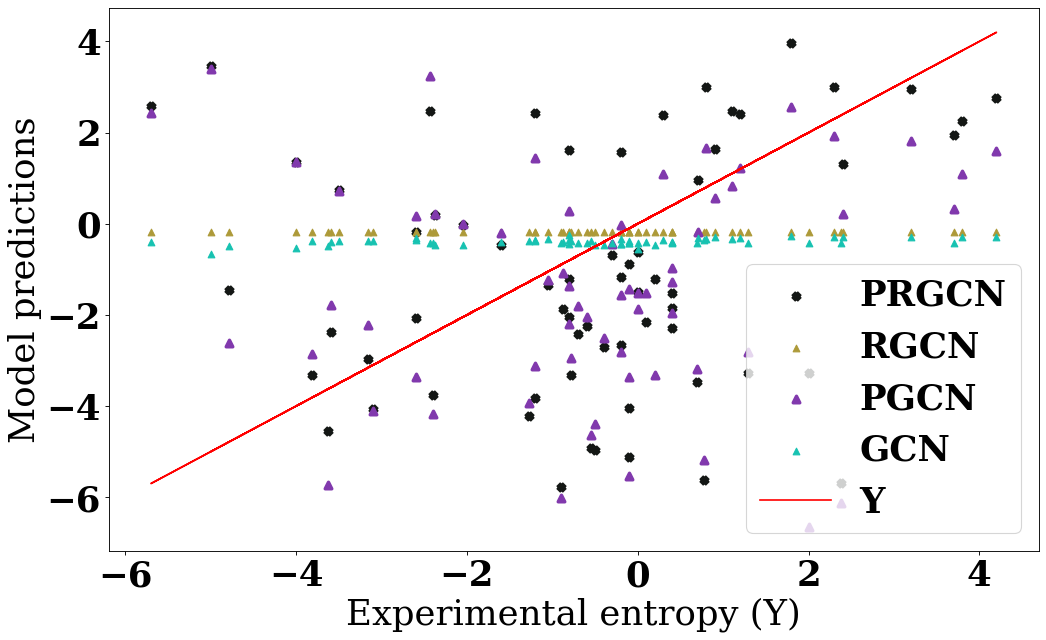

In [13]:
figure(figsize=(15, 9), dpi=80)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 32}

matplotlib.rc('font', **font)
y_curr = np.concatenate(y[1:])
plt.scatter(y_curr, PGCN_PG_pred[0], marker='x', label='PRGCN', linewidths=5, color='#141715')
plt.scatter(y_curr, PGCN_DD_pred[0], marker='^', label='RGCN', color='#ad9a39')
plt.scatter(y_curr, PGNN_PG_pred[0], marker='^', linewidths=3, label='PGCN', color='#8139ad')
plt.scatter(y_curr, PGNN_DD_pred[0], marker='^', label='GCN', color='#17c2b1')
plt.xlabel('Experimental entropy (Y)')
plt.ylabel('Model predictions')
plt.plot(y_curr, y_curr, label = 'Y', color='red')
plt.legend()

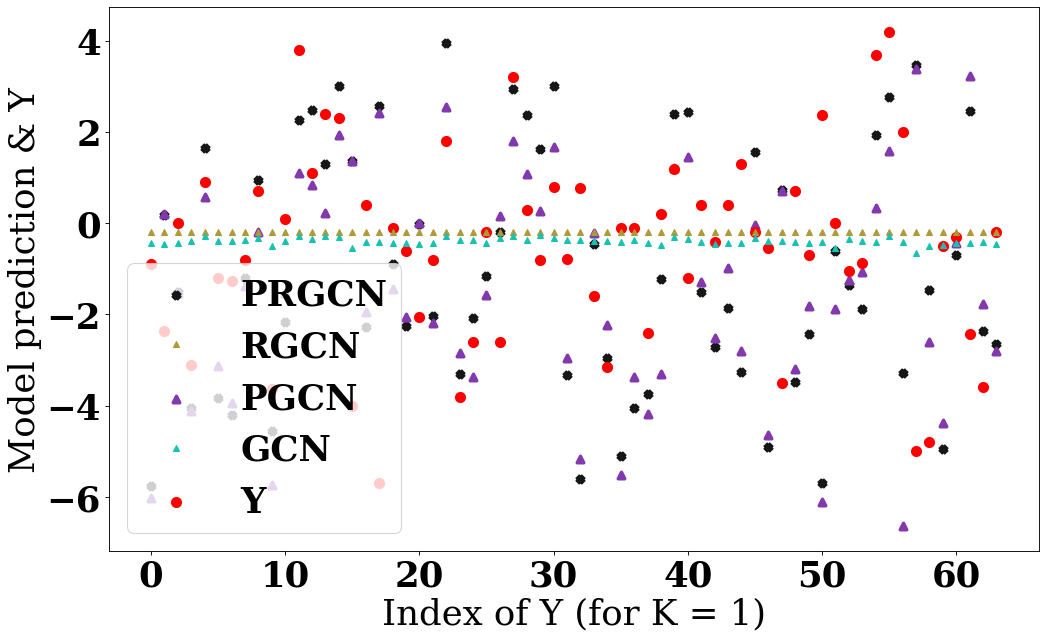

In [14]:
figure(figsize=(15, 9), dpi=80)
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 0]), 0)
x_axis = np.arange(len(y_curr))
plt.scatter(x_axis, PGCN_PG_pred[0], marker='x', label='PRGCN', linewidths=5, color='#141715')
plt.plot(PGCN_DD_pred[0], '^', label='RGCN', color='#ad9a39')
plt.scatter(x_axis, PGNN_PG_pred[0], marker='^', linewidths=3, label='PGCN', color='#8139ad')
plt.plot(PGNN_DD_pred[0], '^', label='GCN', color='#17c2b1')
plt.scatter(x_axis, y_curr, marker='o', label = 'Y', linewidths=4, color='red')
plt.xlabel('Index of Y (for K = 1)')
plt.ylabel('Model prediction & Y')
plt.legend()

In [ ]:
y = np.array(pickle.load(open('y_folds_5.pkl', 'rb')))
info = np.array(pickle.load(open('x_add_folds_5.pkl', 'rb')))

In [ ]:
train_loss = []
test_loss = []
rmse_func = lambda y, y_p: np.sqrt((y_p-y)**2)
for k in range(K):
    y_p = []
    y_t = []
    y_train_pred = np.concatenate([1 * info[i][:,0] - info[i][:,1] - info[i][:,2] for i in range(K) if i != k])
    y_train_true = np.concatenate([y[i] for i in range(K) if i != k])
    y_test_pred = 1 * info[k][:,0] - info[k][:,1] - info[k][:,2]
    y_test_true = y[k]
    train_loss.append(np.sqrt((y_train_pred-y_train_true)**2))
    test_loss.append(np.sqrt((y_test_pred-y_test_true)**2))

In [ ]:
np.mean(test_loss)

In [ ]:
np.std(test_loss)

In [ ]:
np.mean(train_loss)

In [ ]:
np.std(train_loss)

In [17]:
from scipy import stats
PRGCN_corrs = []
RGCN_corrs = []
PGCN_corrs = []
GCN_corrs = []
for k in range(K):
    print('K = %d' % k)
    y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != k]), 0).reshape([64])
    res = stats.pearsonr(PGCN_PG_pred[k].reshape([64]), y_curr)
    PRGCN_corrs.append(res[0])
    res = stats.pearsonr(PGNN_PG_pred[k].reshape([64]), y_curr)
    RGCN_corrs.append(res[0])
    res = stats.pearsonr(PGCN_DD_pred[k].reshape([64]), y_curr)
    print('GCN ', res)
    res = stats.pearsonr(PGNN_DD_pred[k].reshape([64]), y_curr)
    print('GNN ', res)
    y_vm = np.concatenate([1 * info[i][:,0] - info[i][:,1] - info[i][:,2] for i in range(K) if i != k])
    res = stats.pearsonr(y_vm, y_curr)
    print('VM2 ', res)

K = 0
PGCN  0.16845574621479054
PGNN  (0.047401440890046734, 0.7099324829280425)
GCN  (nan, nan)
GNN  (0.48988316638841706, 3.9810839766064236e-05)
VM2  (-0.11994543788151135, 0.34513622669708527)
K = 1
PGCN  0.057882478753803694
PGNN  (-0.0022474165380389002, 0.9859380214283402)
GCN  (nan, nan)
GNN  (0.26644686843378107, 0.03332048646266796)
VM2  (-0.012203471639373836, 0.9237531729841213)
K = 2
PGCN  0.1750376032025142
PGNN  (0.1030009929189955, 0.4179833755102225)
GCN  (nan, nan)
GNN  (0.3414334349107758, 0.005760066550305914)
VM2  (-0.11167030007394665, 0.3796685695091282)
K = 3
PGCN  0.2207518208771212
PGNN  (0.1447032248931235, 0.2539421651699368)
GCN  (nan, nan)
GNN  (0.023504782907399845, 0.853732926245119)
VM2  (-0.1588127360266503, 0.21004785014637362)
K = 4
PGCN  0.29551634699070106
PGNN  (0.24739207782432449, 0.04873729236735673)
GCN  (nan, nan)
GNN  (0.5732848059075447, 7.379131920419504e-07)
VM2  (-0.31842865948303967, 0.010336941750620228)
